<a href="https://colab.research.google.com/github/jpbarragan99/roman_maps/blob/main/Roman_Cities_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maping the Cities of the Roman Empire

In this project we are going to code an interactive map displaying the cities of the Roman Empire classified thanks to the Project Mercury Dataset (https://projectmercury.eu/datasets/). With this map we will be able get some idea on the urban density of the Roman Empire

We are also going to make graphs to understand and visualize how many cities each province had and how many countries inherited those cities.

## 1. Preparation

First we need to import the dataset and the libraries we will be using.

In [ ]:
!pip install plotly==5.14.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [ ]:
rome = pd.read_excel('/content/drive/MyDrive/DS/Hanson2016_CitiesDatabase_OxREP_edit.xlsx')

## 2. The Graphs

We will use matplotlib to graph the data.

First we need to know how many times each province appears on the dataset, the same thing for the countries.

In [ ]:
province_counts = rome['Province'].value_counts()

country_counts = rome['Country'].value_counts()

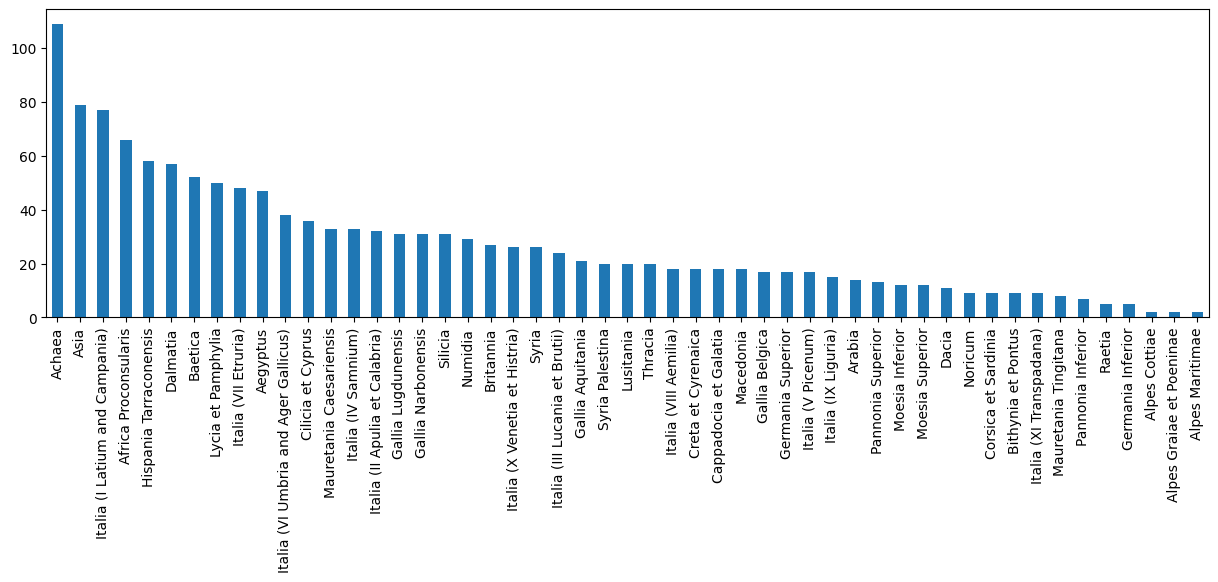

In [ ]:
plt.figure(figsize=(15,4))
province_counts.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()

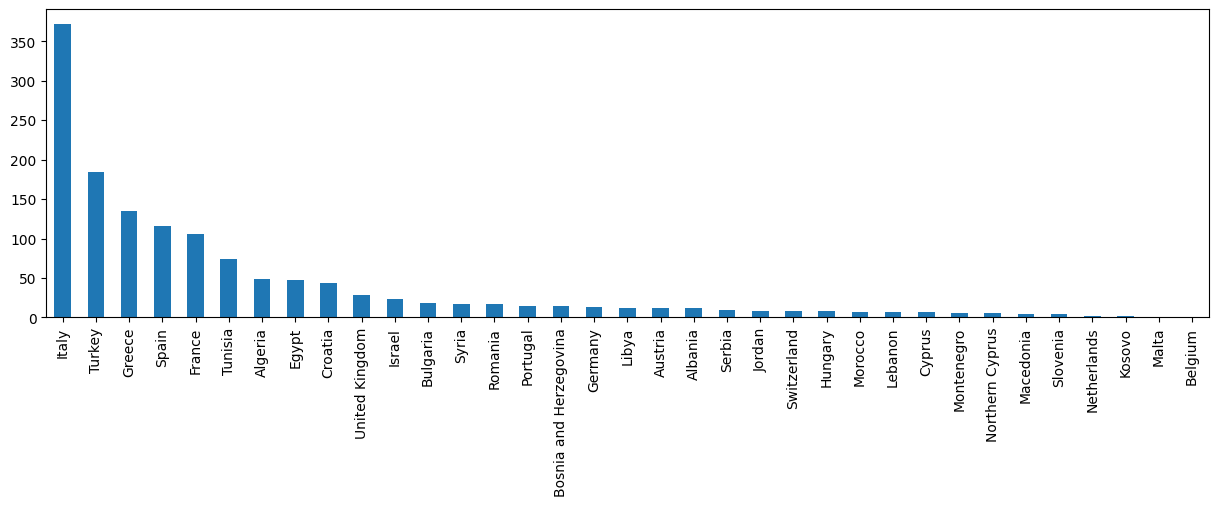

In [ ]:
plt.figure(figsize=(15,4))
country_counts.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()

We can see just how urban Roman Italy was, but also see that the Roman East also very urban, this will be better seen when we make the map.

## 3. The Map

We will use plotly to make this interactive map.

I also color coded the civic status of the cities just to be sure the colors on the map wouldn't repeat or the system will pick colors that can be easily confused between each other.

In [ ]:
civic_status_data = pd.read_excel('/content/drive/MyDrive/DS/Hanson2016_CitiesDatabase_OxREP_edit.xlsx', sheet_name="Civic Status")

In [ ]:
color_map = {
    "Rights and privileges": "firebrick",
    "Colonia": "mediumvioletred",
    "Municipium": "royalblue",
    "Metropolis capital": "red",
    "Civitas capital" : "hotpink",
    "Provincial capital" : "mediumpurple",
    "Conventus capital" : "darkorange",
    "City of the Syrian Decapolis" : "darkgoldenrod",
    "City of the Libyan Pentapolis" : "olivedrab",
    "Capital of the Empire" : "purple"
}

In [ ]:
merged_data = rome.merge(civic_status_data, on="Primary Key", how="left")
merged_data_unique = merged_data.drop_duplicates(subset='Primary Key', keep='first')

In [ ]:
fig = px.scatter_mapbox(merged_data_unique, lat="Latitude (Y)", lon="Longitude (X)", hover_name="Ancient Toponym", color="Civic Status",color_discrete_map=color_map, zoom=3)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

We can now see the distribution of cities on the Roman Empire, also note how cities are located on the coast or along rivers. We can clearly see the Nile River in Egypt and traces of the Rhine and Danube in Europe.